In [35]:
"First of all, knowing who completed FAFSA is not enough, we have to know how many of them were eligible. We have 
found the percentages are 66% and 69% (not significant), but we need the eligibility data to derive conclusions
(explained in Creating notebook).
Secondly, for all the grants and aids, knowing whether a student got the aid or not is not enough, we need to know
whether the student was eligible for it or not (this might be tricky because Perry might not have all the eligibility
creteria) and whether the student applied for it or not. For example, from the AidNs tab we see that 42% rurals and 
36% non-rurals got NB aids (not sure if this is NonInstNB or AnyNB). I need to know how many applied. Because if we
see that given that a student applied, a rural has higher odds than getting a NB aid than non-rural, that's alarming
and something is really wromg with the system (add Aviva's point on system).

So for the submission, I would only focus on those students who completed FAFSA and look at their family Adjusted_GI.
Also might look at AnyAid because others are even more unreliable to make conclusions from. Would be nice to look at 
the categories, because NB aids might have different trends than Federal aids, but lets wait for more data to come
regarding who were eligible and who applied, so that we can condition on applied.

Also ask Perry, when in EFC = 0 and when is AGI = 0, given that they completed FAFSA? Why is Pell = NaN for some?
When in FAFSA not completed, but you GotFederalAid?"

[1] "First of all, knowing who completed FAFSA is not enough, we have to know how many of them were eligible. We have \nfound the percentages are 66% and 69% (not significant), but we need the eligibility data to derive conclusions\n(explained in Creating notebook).\nSecondly, for all the grants and aids, knowing whether a student got the aid or not is not enough, we need to know\nwhether the student was eligible for it or not (this might be tricky because Perry might not have all the eligibility\ncreteria) and whether the student applied for it or not. For example, from the AidNs tab we see that 42% rurals and \n36% non-rurals got NB aids (not sure if this is NonInstNB or AnyNB). I need to know how many applied. Because if we\nsee that given that a student applied, a rural has higher odds than getting a NB aid than non-rural, that's alarming\nand something is really wromg with the system (add Aviva's point on system).\n\nSo for the submission, I would only focus on those students who completed FAFSA and look at their family Adjusted_GI.\nAlso might look at AnyAid because others are even more unreliable to make conclusions from. Would be nice to look at \nthe categories, because NB aids might have different trends than Federal aids, but lets wait for more data to come\nregarding who were eligible and who applied, so that we can condition on applied.\n\nAlso ask Perry, when in EFC = 0 and when is AGI = 0, given that they completed FAFSA? Why is Pell = NaN for some?\nWhen in FAFSA not completed, but you GotFederalAid?"

In [12]:
FamilyIncome = read.csv(file = '../RuralData/StudentLevel_FamilyIncome.csv')
head(FamilyIncome)

,Gender,Rural_or_not,BIPOC_or_not,FirstGen_or_not,Completed_FAFSA,Exp_FamilyContribution,Adjusted_GrossIncome,Got_FedGrants,Got_NeedBasedAid,Got_Any_Aid
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,F,0,0,0,1,4185,22499,1,1,1
2,M,0,0,0,1,14017,47840,0,1,1
3,M,0,1,1,1,1043,14514,0,0,0
4,M,0,1,1,1,1219,46932,1,1,1
5,F,0,0,0,1,18374,57586,0,0,1
6,F,0,0,1,1,6321,28064,0,1,1


In [13]:
FamilyIncome = data.frame(Gender = as.factor(FamilyIncome$Gender),
                          Rural_Status = as.factor(FamilyIncome$Rural_or_not),
                          BIPOC_Status = as.factor(FamilyIncome$BIPOC_or_not),
                          FirstGen_Status = as.factor(FamilyIncome$FirstGen_or_not),
                          Exp_FamilyContribution = FamilyIncome$Exp_FamilyContribution,
                          Adjusted_GrossIncome = FamilyIncome$Adjusted_GrossIncome,
                          Got_FedGrants = as.factor(FamilyIncome$Got_FedGrants)
                         )
FamilyIncome
FamilyIncome = FamilyIncome[FamilyIncome$Exp_FamilyContribution]

Gender,Rural_Status,BIPOC_Status,FirstGen_Status,Exp_FamilyContribution,Adjusted_GrossIncome,Got_FedGrants
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
F,0,0,0,4185,22499,1
M,0,0,0,14017,47840,0
M,0,1,1,1043,14514,0
M,0,1,1,1219,46932,1
F,0,0,0,18374,57586,0
F,0,0,1,6321,28064,0
F,0,1,0,2273,18449,1
M,0,0,1,3392,4466,1
M,0,0,0,1523,15955,1


ERROR: Error in `[.data.frame`(FamilyIncome, FamilyIncome$Exp_FamilyContribution): undefined columns selected


In [17]:
# FamilyIncome$Rural_S = relevel(FamilyIncome$Rural_or_not, ref = "1")
# FamilyIncome$BIPOC_or_not = relevel(FamilyIncome$BIPOC_or_not, ref = "1")
# FamilyIncome$FirstGen_or_not = relevel(FamilyIncome$FirstGen_or_not, ref = "1")

If your family has accumulated wealth and investments, your EFC can be high, even if your family's income is low. This includes checking and savings accounts, bonds and stocks, and even the student's 529 College Savings Plan. ... A dollar of assets counts less in the EFC formula than a dollar of income does.

### Expected Family Contribution

In [14]:
FamilyIncome # Avoiding this in submission because I don't yet know the meaning of EFC = 0.

Gender,Rural_Status,BIPOC_Status,FirstGen_Status,Exp_FamilyContribution,Adjusted_GrossIncome,Got_FedGrants
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
F,0,0,0,4185,22499,1
M,0,0,0,14017,47840,0
M,0,1,1,1043,14514,0
M,0,1,1,1219,46932,1
F,0,0,0,18374,57586,0
F,0,0,1,6321,28064,0
F,0,1,0,2273,18449,1
M,0,0,1,3392,4466,1
M,0,0,0,1523,15955,1


In [99]:
lmod = lm(Exp_FamilyContribution ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status, data = FamilyIncome)
summary(lmod)


Call:
lm(formula = Exp_FamilyContribution ~ Rural_Status + Gender + 
    BIPOC_Status + FirstGen_Status, data = FamilyIncome)

Residuals:
   Min     1Q Median     3Q    Max 
-57090 -35606 -14282   7654 959515 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         55195       1468  37.592  < 2e-16 ***
Rural_Status1       -6997       3389  -2.065    0.039 *  
GenderM              1897       1727   1.098    0.272    
BIPOC_Status1       -9612       1877  -5.122  3.1e-07 ***
FirstGen_Status1   -31419       2192 -14.336  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 73150 on 7180 degrees of freedom
Multiple R-squared:  0.04215,	Adjusted R-squared:  0.04162 
F-statistic:    79 on 4 and 7180 DF,  p-value: < 2.2e-16


In [100]:
lmod2 = lm(Exp_FamilyContribution ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status
          + Rural_Status:Gender + Rural_Status:BIPOC_Status + Rural_Status:FirstGen_Status, data = FamilyIncome)
summary(lmod2)


Call:
lm(formula = Exp_FamilyContribution ~ Rural_Status + Gender + 
    BIPOC_Status + FirstGen_Status + Rural_Status:Gender + Rural_Status:BIPOC_Status + 
    Rural_Status:FirstGen_Status, data = FamilyIncome)

Residuals:
   Min     1Q Median     3Q    Max 
-57483 -35591 -14026   7428 954465 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       55845       1502  37.171  < 2e-16 ***
Rural_Status1                    -15195       5293  -2.871  0.00411 ** 
GenderM                            1639       1791   0.915  0.36000    
BIPOC_Status1                    -10311       1932  -5.338 9.69e-08 ***
FirstGen_Status1                 -32547       2278 -14.288  < 2e-16 ***
Rural_Status1:GenderM              3207       6767   0.474  0.63559    
Rural_Status1:BIPOC_Status1       11755       8109   1.450  0.14720    
Rural_Status1:FirstGen_Status1    13085       8379   1.562  0.11840    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0

In [101]:
anova(lmod2, lmod)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7177,3.837690e+13,NA,NA,NA,NA
2,7180,3.841708e+13,-3,-40184919826,2.505042,0.05725818


In [104]:
lmod3 = lm(Exp_FamilyContribution ~ Rural_Status + BIPOC_Status + FirstGen_Status, data = FamilyIncome)
summary(lmod3)
lmod4 = lm(Exp_FamilyContribution ~ BIPOC_Status + FirstGen_Status, data = FamilyIncome)
summary(lmod3)

anova(lmod, lmod4); anova(lmod3, lmod4)
# Removing Rural makes the model insufficient.


Call:
lm(formula = Exp_FamilyContribution ~ Rural_Status + BIPOC_Status + 
    FirstGen_Status, data = FamilyIncome)

Residuals:
   Min     1Q Median     3Q    Max 
-56185 -35694 -14285   7677 960511 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         56187       1158  48.532  < 2e-16 ***
Rural_Status1       -7073       3388  -2.088   0.0369 *  
BIPOC_Status1       -9626       1876  -5.130 2.98e-07 ***
FirstGen_Status1   -31481       2191 -14.369  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 73150 on 7181 degrees of freedom
Multiple R-squared:  0.04199,	Adjusted R-squared:  0.04159 
F-statistic: 104.9 on 3 and 7181 DF,  p-value: < 2.2e-16



Call:
lm(formula = Exp_FamilyContribution ~ Rural_Status + BIPOC_Status + 
    FirstGen_Status, data = FamilyIncome)

Residuals:
   Min     1Q Median     3Q    Max 
-56185 -35694 -14285   7677 960511 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         56187       1158  48.532  < 2e-16 ***
Rural_Status1       -7073       3388  -2.088   0.0369 *  
BIPOC_Status1       -9626       1876  -5.130 2.98e-07 ***
FirstGen_Status1   -31481       2191 -14.369  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 73150 on 7181 degrees of freedom
Multiple R-squared:  0.04199,	Adjusted R-squared:  0.04159 
F-statistic: 104.9 on 3 and 7181 DF,  p-value: < 2.2e-16


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7180,3.841708e+13,NA,NA,NA,NA
2,7182,3.844686e+13,-2,-29774865806,2.782402,0.0619564


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7181,3.842354e+13,NA,NA,NA,NA
2,7182,3.844686e+13,-1,-23319204021,4.358141,0.03686763


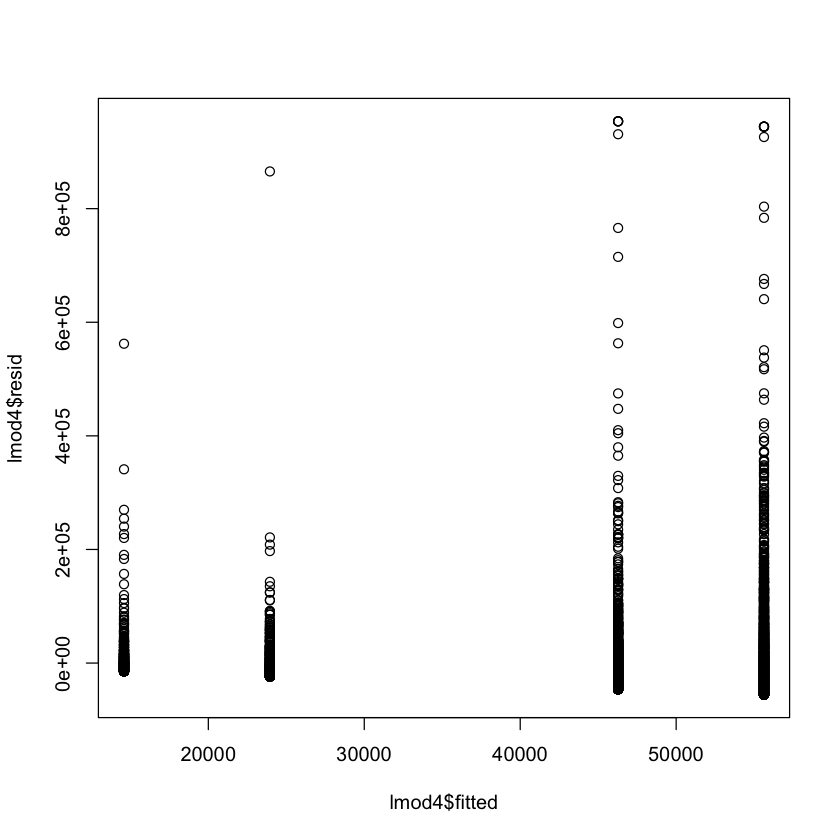

In [105]:
plot(lmod4$fitted, lmod4$resid)

In [7]:
# Reduced model is sufficient, so we stick to lmod with NO interaction terms

### Adjusted Gross Income

In [19]:
lmod = lm(Adjusted_GrossIncome ~ Gender + Rural_Status + BIPOC_Status + FirstGen_Status, data = FamilyIncome)
summary(lmod)


Call:
lm(formula = Adjusted_GrossIncome ~ Gender + Rural_Status + BIPOC_Status + 
    FirstGen_Status, data = FamilyIncome)

Residuals:
     Min       1Q   Median       3Q      Max 
-3173226   -70835   -23840    33687  4918048 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        174671       3643  47.943  < 2e-16 ***
GenderM              6267       4286   1.462  0.14379    
Rural_Status1      -26024       8409  -3.095  0.00198 ** 
BIPOC_Status1      -23738       4656  -5.098 3.52e-07 ***
FirstGen_Status1   -69166       5438 -12.718  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 181500 on 7180 degrees of freedom
Multiple R-squared:  0.03592,	Adjusted R-squared:  0.03538 
F-statistic: 66.88 on 4 and 7180 DF,  p-value: < 2.2e-16


In [27]:
lmod2 = lm(Adjusted_GrossIncome ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status
           + Rural_Status:Gender + Rural_Status:BIPOC_Status + Rural_Status:FirstGen_Status, data = FamilyIncome)
summary(lmod2)

AIC(lmod2)
#chisq.test(FamilyIncome$BIPOC_or_not, FamilyIncome$FirstGen_or_not)


Call:
lm(formula = Adjusted_GrossIncome ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status + Rural_Status:Gender + Rural_Status:BIPOC_Status + 
    Rural_Status:FirstGen_Status, data = FamilyIncome)

Residuals:
     Min       1Q   Median       3Q      Max 
-3175385   -71100   -23140    33960  4917560 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      176830       3728  47.439  < 2e-16 ***
Rural_Status1                    -53588      13132  -4.081 4.54e-05 ***
GenderM                            4596       4443   1.034   0.3010    
BIPOC_Status1                    -25385       4793  -5.297 1.21e-07 ***
FirstGen_Status1                 -72198       5652 -12.775  < 2e-16 ***
Rural_Status1:GenderM             22665      16789   1.350   0.1771    
Rural_Status1:BIPOC_Status1       27178      20119   1.351   0.1768    
Rural_Status1:FirstGen_Status1    35598      20788   1.712   0.0869 .  
---
Signif. codes:  0 

[1] 194401

In [28]:
lmod3 = lm(Adjusted_GrossIncome ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status
           + Rural_Status:FirstGen_Status, data = FamilyIncome)
summary(lmod3)

AIC(lmod3)


Call:
lm(formula = Adjusted_GrossIncome ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status + Rural_Status:FirstGen_Status, data = FamilyIncome)

Residuals:
     Min       1Q   Median       3Q      Max 
-3174057   -70506   -23556    32992  4917269 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      175502       3659  47.968  < 2e-16 ***
Rural_Status1                    -37726       9734  -3.876 0.000107 ***
GenderM                            6215       4285   1.450 0.146999    
BIPOC_Status1                    -23809       4655  -5.115 3.22e-07 ***
FirstGen_Status1                 -72716       5637 -12.900  < 2e-16 ***
Rural_Status1:FirstGen_Status1    45868      19240   2.384 0.017149 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 181400 on 7179 degrees of freedom
Multiple R-squared:  0.03668,	Adjusted R-squared:  0.03601 
F-statistic: 54.67 on 5 and 7179 D

[1] 194400.7

In [32]:
lmod4 = lm(Adjusted_GrossIncome ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status
           + Rural_Status:BIPOC_Status, data = FamilyIncome)
summary(lmod4)

AIC(lmod4)


Call:
lm(formula = Adjusted_GrossIncome ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status + Rural_Status:BIPOC_Status, data = FamilyIncome)

Residuals:
     Min       1Q   Median       3Q      Max 
-3174242   -70769   -23528    33178  4917097 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   175687       3672  47.840  < 2e-16 ***
Rural_Status1                 -37483       9930  -3.775 0.000161 ***
GenderM                         6202       4285   1.447 0.147863    
BIPOC_Status1                 -26055       4776  -5.455 5.06e-08 ***
FirstGen_Status1              -69550       5440 -12.786  < 2e-16 ***
Rural_Status1:BIPOC_Status1    40380      18623   2.168 0.030167 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 181500 on 7179 degrees of freedom
Multiple R-squared:  0.03655,	Adjusted R-squared:  0.03588 
F-statistic: 54.47 on 5 and 7179 DF,  p-value: < 2.2e-16


[1] 194401.6

In [34]:
anova(lmod, lmod2) ; anova(lmod3, lmod2) ; anova(lmod3, lmod); anova(lmod3, lmod4)
# lmod is not sufficient clearly, so some interaction term is necessary. lmod3 does the best with just 1 interaction
# term. Having any other single interaction term in place of Rural_Status:FirstGen_Status increases AIC. Since this
# check is with same number of param, I had to look at AIC because anova doesn't work unless model is reduced!!

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7180,2.365487e+14,NA,NA,NA,NA
2,7177,2.362401e+14,3,308689293070,3.126005,0.02472662


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7179,2.363616e+14,NA,NA,NA,NA
2,7177,2.362401e+14,2,121558862952,1.846486,0.1578656


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7179,2.363616e+14,NA,NA,NA,NA
2,7180,2.365487e+14,-1,-187130430118,5.683704,0.01714901


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7179,2.363616e+14,NA,NA,NA,NA
2,7179,2.363939e+14,0,-32312984168,NA,NA


In [ ]:
# So finally going to using lmod3 with just one interaction term.

### We clearly see that the EFC and AGI of all the possible underpriviledged groups are significantly lower.

In [36]:
# We continue with this datset since FAFSA is used to determine student's eligibility for federal student aid, 
# including low-cost loans, grants, and work-study.

In [80]:
# cor(FamilyIncome$Exp_FamilyContribution, FamilyIncome$Adjusted_GrossIncome) = 0.66, so do not keep them together

glmod = glm(Got_FedGrants ~ Exp_FamilyContribution, data = FamilyIncome, family = "binomial")
summary(glmod)

cor(FamilyIncome$Exp_FamilyContribution, FamilyIncome$Adjusted_GrossIncome)
# This is just sanity check.
# Not surprising. Higher your exp family contri or adjusted gross income, lower your chances of getting a Federal Aid

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Got_FedGrants ~ Exp_FamilyContribution, family = "binomial", 
    data = FamilyIncome)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4095  -0.0539  -0.0001   0.0000   8.4904  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             2.865e+00  1.036e-01   27.66   <2e-16 ***
Exp_FamilyContribution -4.657e-04  1.589e-05  -29.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7346.0  on 7184  degrees of freedom
Residual deviance: 2387.8  on 7183  degrees of freedom
AIC: 2391.8

Number of Fisher Scoring iterations: 11


[1] 0.6623159

In [43]:
glmod2 = glm(Got_FedGrants ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status, data = FamilyIncome, 
             family = "binomial")
summary(glmod2)
# So whether you are getting the Fed Aid or not depends mostly your income and less on your features.
# Are first gen students considered more?

# Down below repeated this for NeedBased Grants


Call:
glm(formula = Got_FedGrants ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status, family = "binomial", data = FamilyIncome)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2696  -0.6230  -0.5143  -0.4990   2.0713  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.02078    0.05692 -35.504  < 2e-16 ***
Rural_Status1     0.27516    0.11451   2.403   0.0163 *  
GenderM           0.06442    0.06150   1.047   0.2949    
BIPOC_Status1     0.47997    0.06460   7.429 1.09e-13 ***
FirstGen_Status1  1.41548    0.06692  21.150  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7346.0  on 7184  degrees of freedom
Residual deviance: 6677.9  on 7180  degrees of freedom
AIC: 6687.9

Number of Fisher Scoring iterations: 4


In [44]:
glmod3 = glm(Got_FedGrants ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status
             + Rural_Status:Gender + Rural_Status:BIPOC_Status + Rural_Status:FirstGen_Status,
             data = FamilyIncome, family = "binomial")
summary(glmod3)


Call:
glm(formula = Got_FedGrants ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status + Rural_Status:Gender + Rural_Status:BIPOC_Status + 
    Rural_Status:FirstGen_Status, family = "binomial", data = FamilyIncome)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1683  -0.6332  -0.5060  -0.4926   2.0829  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -2.04779    0.05902 -34.695  < 2e-16 ***
Rural_Status1                   0.54251    0.18271   2.969  0.00299 ** 
GenderM                         0.05694    0.06434   0.885  0.37618    
BIPOC_Status1                   0.50925    0.06717   7.581 3.43e-14 ***
FirstGen_Status1                1.46002    0.06971  20.944  < 2e-16 ***
Rural_Status1:GenderM           0.10784    0.22017   0.490  0.62426    
Rural_Status1:BIPOC_Status1    -0.37150    0.25418  -1.462  0.14386    
Rural_Status1:FirstGen_Status1 -0.51591    0.25104  -2.055  0.03987 *

In [77]:
glmod4 = glm(Got_FedGrants ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status
             + Rural_Status:FirstGen_Status,
             data = FamilyIncome, family = "binomial")
summary(glmod4)


Call:
glm(formula = Got_FedGrants ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status + Rural_Status:FirstGen_Status, family = "binomial", 
    data = FamilyIncome)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1667  -0.6271  -0.5094  -0.4940   2.0804  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -2.04213    0.05765 -35.425  < 2e-16 ***
Rural_Status1                   0.51553    0.13679   3.769 0.000164 ***
GenderM                         0.06554    0.06153   1.065 0.286856    
BIPOC_Status1                   0.48282    0.06470   7.462 8.53e-14 ***
FirstGen_Status1                1.46842    0.06952  21.122  < 2e-16 ***
Rural_Status1:FirstGen_Status1 -0.65864    0.23221  -2.836 0.004563 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7346.0  on 7184  degrees of freedom
Residual d

### This is interesting

In [106]:
glmodT = glm(Got_FedGrants ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status 
             + Exp_FamilyContribution, data = FamilyIncome, family = "binomial")
summary(glmodT)

glmodT2 = glm(Got_FedGrants ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status + Exp_FamilyContribution
              + Rural_Status:Gender + Rural_Status:BIPOC_Status + Rural_Status:FirstGen_Status 
             + Rural_Status:Exp_FamilyContribution, data = FamilyIncome, family = "binomial")
summary(glmodT2)

glmodT3 = glm(Got_FedGrants ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status 
              + Rural_Status:FirstGen_Status 
             + Exp_FamilyContribution, data = FamilyIncome, family = "binomial")
summary(glmodT3)

glmodT4 = glm(Got_FedGrants ~ FirstGen_Status
             + Exp_FamilyContribution, data = FamilyIncome, family = "binomial")
summary(glmodT4)

# Whether you are getting FedGrants or not depends on your family contribution and whether you are a first gen 
# student or not. First show glmod, and then say the one with least AIC is the one that has only 2 terms. This is 
# great news because ...... esoecially because of gender.

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Got_FedGrants ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status + Exp_FamilyContribution, family = "binomial", 
    data = FamilyIncome)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4378  -0.0538  -0.0001   0.0000   8.4904  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             2.751e+00  1.376e-01  19.998   <2e-16 ***
Rural_Status1          -5.954e-02  1.859e-01  -0.320   0.7488    
GenderM                 1.206e-02  1.034e-01   0.117   0.9071    
BIPOC_Status1           3.179e-03  1.106e-01   0.029   0.9771    
FirstGen_Status1        2.197e-01  1.124e-01   1.955   0.0506 .  
Exp_FamilyContribution -4.619e-04  1.597e-05 -28.926   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7346.0  on 7184  degrees of freedom
Residual deviance: 2384.1  on 7179  degrees of freedom
AIC

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Got_FedGrants ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status + Exp_FamilyContribution + Rural_Status:Gender + 
    Rural_Status:BIPOC_Status + Rural_Status:FirstGen_Status + 
    Rural_Status:Exp_FamilyContribution, family = "binomial", 
    data = FamilyIncome)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6207  -0.0548  -0.0001   0.0000   8.4904  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           2.682e+00  1.406e-01  19.082   <2e-16 ***
Rural_Status1                         9.614e-01  5.737e-01   1.676   0.0938 .  
GenderM                               2.404e-02  1.074e-01   0.224   0.8228    
BIPOC_Status1                         2.044e-02  1.139e-01   0.179   0.8576    
FirstGen_Status1                      2.365e-01  1.161e-01   2.037   0.0416 *  
Exp_FamilyContribution               -4.535e-04  1.632e-05 -27.784   <2e-16 ***
Rural_Status

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Got_FedGrants ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status + Rural_Status:FirstGen_Status + Exp_FamilyContribution, 
    family = "binomial", data = FamilyIncome)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4422  -0.0535  -0.0001   0.0000   8.4904  

Coefficients:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     2.744e+00  1.381e-01  19.865   <2e-16 ***
Rural_Status1                   1.822e-02  2.326e-01   0.078   0.9376    
GenderM                         1.187e-02  1.034e-01   0.115   0.9086    
BIPOC_Status1                   4.829e-03  1.106e-01   0.044   0.9652    
FirstGen_Status1                2.366e-01  1.164e-01   2.032   0.0421 *  
Exp_FamilyContribution         -4.619e-04  1.597e-05 -28.921   <2e-16 ***
Rural_Status1:FirstGen_Status1 -2.135e-01  3.828e-01  -0.558   0.5769    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersio

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Got_FedGrants ~ FirstGen_Status + Exp_FamilyContribution, 
    family = "binomial", data = FamilyIncome)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4523  -0.0537  -0.0001   0.0000   8.4904  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             2.753e+00  1.153e-01  23.885   <2e-16 ***
FirstGen_Status1        2.214e-01  1.057e-01   2.095   0.0361 *  
Exp_FamilyContribution -4.619e-04  1.595e-05 -28.965   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7346.0  on 7184  degrees of freedom
Residual deviance: 2384.2  on 7182  degrees of freedom
AIC: 2390.2

Number of Fisher Scoring iterations: 11


In [73]:
"
There's a warning which is very important. Make sure you do look into it later. Follow the link:
https://discuss.analyticsvidhya.com/t/glm-fit-fitted-probabilities-numerically-0-or-1-occurred-warning-message-when-i-run-logistic-regression/10390/5
"

[1] "\nThere's a warning which is very important. Make sure you do look into it later. Follow the link:\nhttps://discuss.analyticsvidhya.com/t/glm-fit-fitted-probabilities-numerically-0-or-1-occurred-warning-message-when-i-run-logistic-regression/10390/5\n"

In [55]:
AidsAndGrants = read.csv(file = '../RuralData/StudentLevel_AidsAndGrants.csv')
head(AidsAndGrants)

,Gender,Rural_or_not,BIPOC_or_not,FirstGen_or_not,Completed_FAFSA,Exp_FamilyContribution,Adjusted_GrossIncome,Got_FedGrants,Got_NeedBasedAid,Got_Any_Aid
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,M,0,0,0,0,NA,NA,0,0,0
2,F,0,1,0,0,NA,NA,0,0,0
3,M,0,0,0,0,NA,NA,0,0,0
4,F,0,0,0,1,4185,22499,1,1,1
5,M,0,0,0,1,0,11753,0,1,1
6,M,0,0,0,1,14017,47840,0,1,1


In [56]:
AidsAndGrants$Gender = as.factor(AidsAndGrants$Gender)
AidsAndGrants$Rural_or_not = as.factor(AidsAndGrants$Rural_or_not)
AidsAndGrants$BIPOC_or_not = as.factor(AidsAndGrants$BIPOC_or_not)
AidsAndGrants$FirstGen_or_not = as.factor(AidsAndGrants$FirstGen_or_not)
AidsAndGrants$Completed_FAFSA = as.factor(AidsAndGrants$Completed_FAFSA)
AidsAndGrants$Got_FedGrants = as.factor(AidsAndGrants$Got_FedGrants)
AidsAndGrants$Got_NeedBasedAid = as.factor(AidsAndGrants$Got_NeedBasedAid)
AidsAndGrants$Got_Any_Aid = as.factor(AidsAndGrants$Got_Any_Aid)

AidsAndGrants

Gender,Rural_or_not,BIPOC_or_not,FirstGen_or_not,Completed_FAFSA,Exp_FamilyContribution,Adjusted_GrossIncome,Got_FedGrants,Got_NeedBasedAid,Got_Any_Aid
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>
M,0,0,0,0,NA,NA,0,0,0
F,0,1,0,0,NA,NA,0,0,0
M,0,0,0,0,NA,NA,0,0,0
F,0,0,0,1,4185,22499,1,1,1
M,0,0,0,1,0,11753,0,1,1
M,0,0,0,1,14017,47840,0,1,1
F,0,1,1,1,0,0,1,1,1
M,0,1,1,1,1043,14514,0,0,0
M,0,1,1,1,1219,46932,1,1,1


In [57]:
names(AidsAndGrants)[names(AidsAndGrants) == "Rural_or_not"] <- "Rural_Status"
names(AidsAndGrants)[names(AidsAndGrants) == "BIPOC_or_not"] <- "BIPOC_Status"
names(AidsAndGrants)[names(AidsAndGrants) == "FirstGen_or_not"] <- "FirstGen_Status"
AidsAndGrants

Gender,Rural_Status,BIPOC_Status,FirstGen_Status,Completed_FAFSA,Exp_FamilyContribution,Adjusted_GrossIncome,Got_FedGrants,Got_NeedBasedAid,Got_Any_Aid
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>
M,0,0,0,0,NA,NA,0,0,0
F,0,1,0,0,NA,NA,0,0,0
M,0,0,0,0,NA,NA,0,0,0
F,0,0,0,1,4185,22499,1,1,1
M,0,0,0,1,0,11753,0,1,1
M,0,0,0,1,14017,47840,0,1,1
F,0,1,1,1,0,0,1,1,1
M,0,1,1,1,1043,14514,0,0,0
M,0,1,1,1,1219,46932,1,1,1


In [58]:
AidsAndGrants <- subset(AidsAndGrants, select = -c(Got_NeedBasedAid))
# Because I am not sure about the eligibility of students for these NeedBasedAid, so avoiding conclusions for now.

In [42]:
# AidsAndGrants$Rural_or_not = relevel(AidsAndGrants$Rural_or_not, ref = "1")
# AidsAndGrants$BIPOC_or_not = relevel(AidsAndGrants$BIPOC_or_not, ref = "1")
# AidsAndGrants$FirstGen_or_not = relevel(AidsAndGrants$FirstGen_or_not, ref = "1")

In [59]:
AidsAndGrants

,Gender,Rural_Status,BIPOC_Status,FirstGen_Status,Completed_FAFSA,Exp_FamilyContribution,Adjusted_GrossIncome,Got_FedGrants,Got_Any_Aid
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,M,0,0,0,0,NA,NA,0,0
2,F,0,1,0,0,NA,NA,0,0
3,M,0,0,0,0,NA,NA,0,0
4,F,0,0,0,1,4185,22499,1,1
5,M,0,0,0,1,0,11753,0,1
6,M,0,0,0,1,14017,47840,0,1
7,F,0,1,1,1,0,0,1,1
8,M,0,1,1,1,1043,14514,0,0
9,M,0,1,1,1,1219,46932,1,1


In [64]:
glmod = glm(Got_Any_Aid ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status, data = AidsAndGrants, 
            family = "binomial")
summary(glmod)


Call:
glm(formula = Got_Any_Aid ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status, family = "binomial", data = AidsAndGrants)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2414  -1.4755   0.6810   0.8354   0.9062  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.87334    0.03446  25.341  < 2e-16 ***
Rural_Status1     0.17512    0.08498   2.061   0.0393 *  
GenderM          -0.19542    0.04164  -4.693 2.69e-06 ***
BIPOC_Status1     0.46997    0.04813   9.765  < 2e-16 ***
FirstGen_Status1  0.90892    0.06617  13.736  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 14448  on 12746  degrees of freedom
Residual deviance: 13961  on 12742  degrees of freedom
AIC: 13971

Number of Fisher Scoring iterations: 4


In [65]:
glmod2 = glm(Got_Any_Aid ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status
            + Rural_Status:Gender + Rural_Status:BIPOC_Status + Rural_Status:FirstGen_Status, data = AidsAndGrants, 
            family = "binomial")
summary(glmod2)


Call:
glm(formula = Got_Any_Aid ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status + Rural_Status:Gender + Rural_Status:BIPOC_Status + 
    Rural_Status:FirstGen_Status, family = "binomial", data = AidsAndGrants)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2236  -1.4789   0.6848   0.8411   0.9033  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     0.85718    0.03505  24.453  < 2e-16 ***
Rural_Status1                   0.43223    0.14004   3.086  0.00203 ** 
GenderM                        -0.17163    0.04302  -3.989 6.63e-05 ***
BIPOC_Status1                   0.47357    0.04927   9.611  < 2e-16 ***
FirstGen_Status1                0.92671    0.06907  13.418  < 2e-16 ***
Rural_Status1:GenderM          -0.37445    0.17189  -2.178  0.02938 *  
Rural_Status1:BIPOC_Status1    -0.08603    0.22828  -0.377  0.70627    
Rural_Status1:FirstGen_Status1 -0.21967    0.24416  -0.900  0.36829   

In [66]:
glmod2 = glm(Got_Any_Aid ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status
            + Rural_Status:Gender, data = AidsAndGrants, 
            family = "binomial")
summary(glmod2)


Call:
glm(formula = Got_Any_Aid ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status + Rural_Status:Gender, family = "binomial", 
    data = AidsAndGrants)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3202  -1.4802   0.6849   0.8399   0.9022  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)            0.86043    0.03490  24.655  < 2e-16 ***
Rural_Status1          0.38211    0.13138   2.908  0.00363 ** 
GenderM               -0.17195    0.04301  -3.998 6.38e-05 ***
BIPOC_Status1          0.47014    0.04813   9.768  < 2e-16 ***
FirstGen_Status1       0.90879    0.06618  13.732  < 2e-16 ***
Rural_Status1:GenderM -0.37140    0.17262  -2.152  0.03143 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 14448  on 12746  degrees of freedom
Residual deviance: 13957  on 12741  degrees of freedom
AIC: 13969

Number of Fisher

In [ ]:
"I don't think I should report Got_Any_Aid for now because it is so broad and generic. What if there are many 
aids that are meant only for girls? Ask Karen if there really are. Because in that case, obviously this would be the
case, and this result can be explained."

In [98]:
glmod = glm(Completed_FAFSA ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status, data = AidsAndGrants, 
            family = "binomial")
summary(glmod)

glmod2 = glm(Completed_FAFSA ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status
            + Rural_Status:Gender + Rural_Status:BIPOC_Status + Rural_Status:FirstGen_Status, data = AidsAndGrants, 
            family = "binomial")
summary(glmod2)

glmod3 = glm(Completed_FAFSA ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status
            + Rural_Status:Gender + Rural_Status:FirstGen_Status, data = AidsAndGrants, 
            family = "binomial")
summary(glmod3)

glmod4 = glm(Completed_FAFSA ~ Rural_Status + Gender + BIPOC_Status + FirstGen_Status
            + Rural_Status:Gender, data = AidsAndGrants, 
            family = "binomial")
summary(glmod4)

# glmod4 is the final one.


Call:
glm(formula = Completed_FAFSA ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status, family = "binomial", data = AidsAndGrants)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1798  -1.2826   0.6308   1.0113   1.0757  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.40422    0.03204  12.617  < 2e-16 ***
Rural_Status1     0.13453    0.07830   1.718   0.0858 .  
GenderM          -0.16020    0.03884  -4.125 3.71e-05 ***
BIPOC_Status1     0.46985    0.04416  10.640  < 2e-16 ***
FirstGen_Status1  1.26964    0.06327  20.067  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 16258  on 12746  degrees of freedom
Residual deviance: 15401  on 12742  degrees of freedom
AIC: 15411

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Completed_FAFSA ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status + Rural_Status:Gender + Rural_Status:BIPOC_Status + 
    Rural_Status:FirstGen_Status, family = "binomial", data = AidsAndGrants)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2486  -1.2886   0.6222   1.0172   1.0964  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     0.38910    0.03264  11.922  < 2e-16 ***
Rural_Status1                   0.37317    0.12561   2.971  0.00297 ** 
GenderM                        -0.13156    0.04018  -3.275  0.00106 ** 
BIPOC_Status1                   0.46272    0.04521  10.236  < 2e-16 ***
FirstGen_Status1                1.28619    0.06604  19.477  < 2e-16 ***
Rural_Status1:GenderM          -0.43728    0.15804  -2.767  0.00566 ** 
Rural_Status1:BIPOC_Status1     0.15422    0.21382   0.721  0.47073    
Rural_Status1:FirstGen_Status1 -0.22050    0.23283  -0.947  0.3436


Call:
glm(formula = Completed_FAFSA ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status + Rural_Status:Gender + Rural_Status:FirstGen_Status, 
    family = "binomial", data = AidsAndGrants)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2141  -1.2878   0.6234   1.0180   1.0883  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     0.38724    0.03253  11.903  < 2e-16 ***
Rural_Status1                   0.39454    0.12205   3.233  0.00123 ** 
GenderM                        -0.13147    0.04018  -3.272  0.00107 ** 
BIPOC_Status1                   0.46976    0.04417  10.636  < 2e-16 ***
FirstGen_Status1                1.28372    0.06595  19.466  < 2e-16 ***
Rural_Status1:GenderM          -0.43714    0.15774  -2.771  0.00558 ** 
Rural_Status1:FirstGen_Status1 -0.17418    0.22389  -0.778  0.43659    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for 


Call:
glm(formula = Completed_FAFSA ~ Rural_Status + Gender + BIPOC_Status + 
    FirstGen_Status + Rural_Status:Gender, family = "binomial", 
    data = AidsAndGrants)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.271  -1.288   0.627   1.017   1.098  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)            0.38876    0.03247  11.972  < 2e-16 ***
Rural_Status1          0.37085    0.11821   3.137  0.00171 ** 
GenderM               -0.13163    0.04017  -3.277  0.00105 ** 
BIPOC_Status1          0.47006    0.04417  10.643  < 2e-16 ***
FirstGen_Status1       1.26992    0.06329  20.065  < 2e-16 ***
Rural_Status1:GenderM -0.43752    0.15839  -2.762  0.00574 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 16258  on 12746  degrees of freedom
Residual deviance: 15393  on 12741  degrees of freedom
AIC: 15405

Number of Fisher Scori

In [ ]:
# Interesting!
# Among non-rural students, males are filling out FAFSA at a significantly lower rate than their female counterparts,
# but among the rural students, this gap is even more and significantly so.
# But caution against interpretation because eligibility not known, what if more international students among females?

In [ ]:
# Average aid amount received ---> Future work!